<a href="https://colab.research.google.com/github/sap156/infinityskillshub/blob/main/Semantic_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI for Data Professionals
# Data Generation and Augmentation — Module 2 Part 1

# 🎯 Synthetic Data Generation with AI

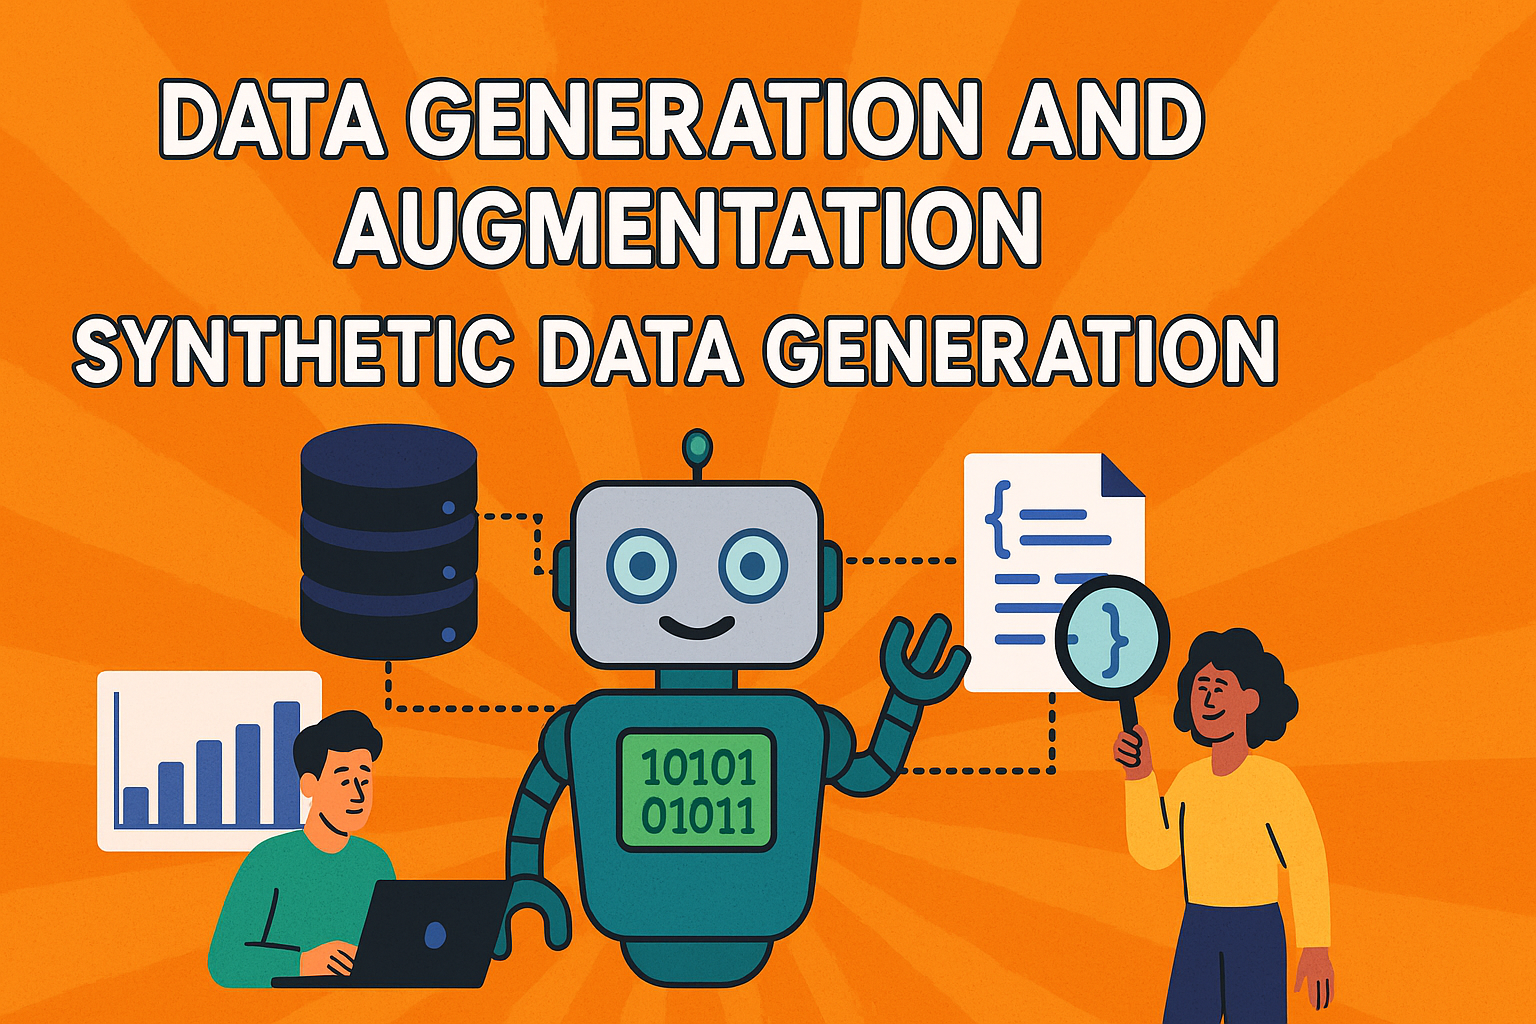

**In this module, we will explore how Generative AI and Large Language Models (LLMs)
can assist with data generation and augmentation.**

This is one of the most impactful use cases of Generative AI, allowing us to create
synthetic data from scratch or augment existing datasets efficiently.

**Learning Objectives:**
- ✅ Understand why synthetic data is essential for data workflows
- ✅ Generate realistic synthetic datasets using AI
- ✅ Create domain-specific data for various business contexts
- ✅ Introduce controlled bias and edge cases for testing
- ✅ Generate location-specific and targeted datasets

# =====================================================
# 🔄 INTRODUCTION: WHY SYNTHETIC DATA MATTERS
# ===============================================


## Common Data Professional Challenges

As data professionals, we often need to generate or extend datasets for various reasons:

🧪 **Testing Data Pipelines:** When developing data pipelines, we need sample data that mimics real-world data

🔒 **Avoiding PII Exposure:** Using real production data introduces privacy risks, especially with
Personally Identifiable Information (PII). Synthetic data eliminates this risk.

🐛 **Handling Edge Cases:** We need to test how our systems handle unusual or problematic data

⚖️ **Fixing Imbalanced Datasets:** Real data often lacks representation in certain categories

📊 **Development Speed:** Waiting for real data slows down development and testing cycles


In [ ]:
# Example of traditional random generation
import random
import datetime

print("🔧 Traditional Random Data Generation:")
traditional_data = []
for i in range(5):
    weather_data = {
        'temperature': random.randint(-10, 120),
        'humidity': random.randint(0, 100),
        'wind_speed': round(random.uniform(10, 100), 2),
        'date': datetime.date(2025, random.randint(1, 12), random.randint(1, 30))
    }
    traditional_data.append(weather_data)

for data in traditional_data:
    print(data)

print("\n❌ Notice: Data is technically correct but feels artificial and random")
print("✅ AI-generated data will show realistic patterns and relationships")

In [19]:
# Install libraries
!pip install openai pandas scikit-learn matplotlib

In [20]:
# Generate Synthetic Data Example 1

from openai import OpenAI
import pandas as pd
import json
import numpy as np
from pprint import pprint
from google.colab import userdata

api_key = userdata.get('OPENAI_API_KEY')

# Initialize OpenAI client
client = OpenAI(api_key=api_key)

prompt = "Generate synthetic weather data. Include fields for date, temperature (in Celcius), Humidity and Wind_speed. The data should be realistic and the fields must have co-relation. Create data for 10 days. Output in JSON form."


response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user",
         "content": prompt
         }
        ],
    response_format={"type": "json_object"}
)

customer_data = json.loads(response.choices[0].message.content)
print(json.dumps(customer_data, indent=2))




{
  "weather_data": [
    {
      "date": "2023-10-01",
      "temperature": 23.5,
      "humidity": 60,
      "wind_speed": 15
    },
    {
      "date": "2023-10-02",
      "temperature": 25.0,
      "humidity": 55,
      "wind_speed": 10
    },
    {
      "date": "2023-10-03",
      "temperature": 22.0,
      "humidity": 65,
      "wind_speed": 8
    },
    {
      "date": "2023-10-04",
      "temperature": 20.5,
      "humidity": 70,
      "wind_speed": 5
    },
    {
      "date": "2023-10-05",
      "temperature": 18.0,
      "humidity": 75,
      "wind_speed": 6
    },
    {
      "date": "2023-10-06",
      "temperature": 19.5,
      "humidity": 72,
      "wind_speed": 7
    },
    {
      "date": "2023-10-07",
      "temperature": 24.0,
      "humidity": 58,
      "wind_speed": 12
    },
    {
      "date": "2023-10-08",
      "temperature": 26.5,
      "humidity": 52,
      "wind_speed": 11
    },
    {
      "date": "2023-10-09",
      "temperature": 27.0,
      "humidity":

In [21]:
# Convert to DataFrame
def clean(dict_variable):
    return next(iter(dict_variable.values()))

df_customers = pd.DataFrame(clean(customer_data))
print(df_customers)

         date  temperature  humidity  wind_speed
0  2023-10-01         23.5        60          15
1  2023-10-02         25.0        55          10
2  2023-10-03         22.0        65           8
3  2023-10-04         20.5        70           5
4  2023-10-05         18.0        75           6
5  2023-10-06         19.5        72           7
6  2023-10-07         24.0        58          12
7  2023-10-08         26.5        52          11
8  2023-10-09         27.0        50           9
9  2023-10-10         21.5        66          14


In [22]:
# Generate Synthetic Data Example 2

prompt = "Generate 5 synthetic product reviews for a smartphone. Include fields for review_id, rating (1-5), and review_text. Output in JSON form."


response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {"role": "user",
         "content": prompt
         }
        ],
    response_format={"type": "json_object"}
)

product_data = json.loads(response.choices[0].message.content)
print(json.dumps(product_data, indent=2))

df_product = pd.DataFrame(clean(product_data))
print(df_product)


{
  "reviews": [
    {
      "review_id": "1",
      "rating": 5,
      "review_text": "Absolutely love this smartphone! The camera quality is amazing and the battery life lasts all day. The interface is smooth and intuitive, making it easy to navigate. Highly recommend!"
    },
    {
      "review_id": "2",
      "rating": 3,
      "review_text": "Decent smartphone but nothing extraordinary. It performs well for basic tasks, but I experienced some lag when running multiple applications. Good for the price, but I was expecting more."
    },
    {
      "review_id": "3",
      "rating": 4,
      "review_text": "Great value for the price! The display is vibrant and the sound quality is impressive. However, I noticed the fingerprint sensor can be a bit slow at times. Overall, I'm quite satisfied!"
    },
    {
      "review_id": "4",
      "rating": 2,
      "review_text": "Disappointing experience. The phone frequently crashes, and customer support has been unhelpful. The features sounde